In [3]:
import math
import pandas as pd
import pandas_datareader as pdr
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
import yfinance as yf


In [4]:
#df = pdr.DataReader('AAPL',data_source='yahoo',start='2013-01-01',end='2019-12-30')
df = yf.download('AAPL', start='2013-01-01', end='2019-12-30')

[*********************100%***********************]  1 of 1 completed


In [5]:
df

Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2012-12-31  18.233213  19.121429  18.178572  19.006071  16.488508  659492400
2013-01-02  19.779285  19.821428  19.343929  19.608213  17.010899  560518000
2013-01-03  19.567142  19.631071  19.321428  19.360714  16.796177  352965200
2013-01-04  19.177500  19.236786  18.779642  18.821428  16.328323  594333600
2013-01-07  18.642857  18.903570  18.400000  18.710714  16.232281  484156400
...               ...        ...        ...        ...        ...        ...
2019-12-20  70.557503  70.662498  69.639999  69.860001  69.041237  275978000
2019-12-23  70.132500  71.062500  70.092499  71.000000  70.167885   98572000
2019-12-24  71.172501  71.222504  70.730003  71.067497  70.234581   48478800
2019-12-26  71.205002  72.495003  71.175003  72.477501  71.628067   93121200
2019-12-27  72.779999  73.492500  72.029999  72.449997  71.600876  146266000

[1761 rows x 6 columns]

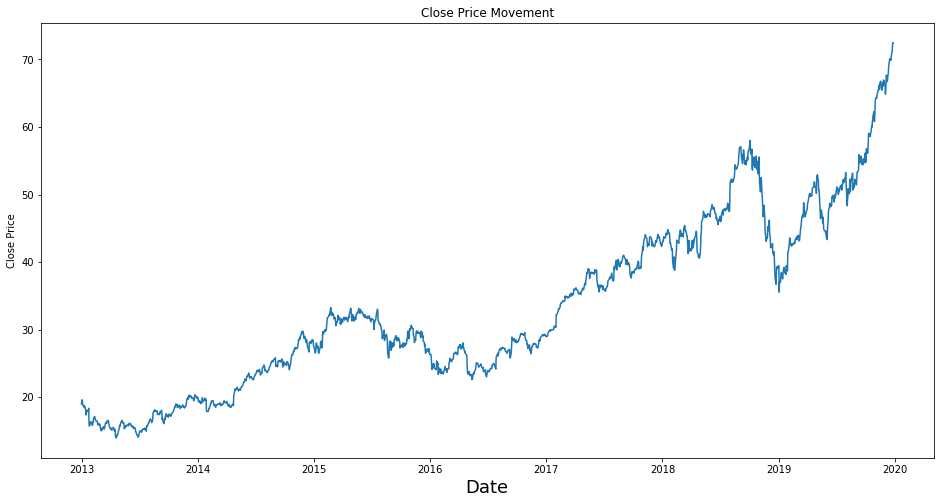

In [6]:
plt.figure(figsize=(16,8))
plt.title("Close Price Movement")
plt.plot(df['Close'])
plt.xlabel("Date",fontsize=18)
plt.ylabel("Close Price")
plt.show()

In [7]:
data = df.filter(['Close'])
dataset = data.values

In [8]:
dataset

array([[19.00607109],
       [19.60821342],
       [19.36071396],
       ...,
       [71.06749725],
       [72.47750092],
       [72.44999695]])

In [9]:
len(dataset)

1761

In [10]:
training_data_size = math.ceil(len(dataset)*.7)
training_data_size

1233

In [11]:
sc = MinMaxScaler(feature_range = (0, 1))
scaled_data = sc.fit_transform(dataset)
scaled_data

array([[0.08642697],
       [0.09671473],
       [0.09248614],
       ...,
       [0.97590973],
       [1.        ],
       [0.99953009]])

In [12]:
train_data = scaled_data[0:training_data_size,:]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)

[array([0.08642697, 0.09671473, 0.09248614, 0.08327231, 0.08138073,
       0.08224107, 0.07723146, 0.08114277, 0.07918407, 0.06786508,
       0.05820581, 0.07051327, 0.06843253, 0.06679725, 0.06970784,
       0.07534597, 0.03659297, 0.03011276, 0.03618413, 0.0413341 ,
       0.04045544, 0.03963779, 0.03849673, 0.03160162, 0.04107174,
       0.04077275, 0.04740548, 0.05153035, 0.05455076, 0.04721022,
       0.04666715, 0.04641088, 0.04248737, 0.04238361, 0.03558615,
       0.03388371, 0.03678211, 0.03189452, 0.03565937, 0.03297453,
       0.03104025, 0.0243709 , 0.01801275, 0.02477971, 0.02143589,
       0.02443801, 0.02513363, 0.02888628, 0.0231261 , 0.02307729,
       0.02560958, 0.03241927, 0.03977814, 0.03902762, 0.03755704,
       0.03795366, 0.0435552 , 0.04457421, 0.04308535, 0.03755704])]
[0.0318090870806477]
[array([0.08642697, 0.09671473, 0.09248614, 0.08327231, 0.08138073,
       0.08224107, 0.07723146, 0.08114277, 0.07918407, 0.06786508,
       0.05820581, 0.07051327, 0.0684

In [13]:
x_train,Y_train = np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1173, 60, 1)

In [14]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(units = 50, return_sequences = False))
model.add(Dense(units = 50))
model.add(Dense(units = 1))


In [15]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [16]:
model.fit(x_train, Y_train, epochs = 10, batch_size = 10)

Epoch 1/10
118/118 [==============================] - 17s 25ms/step - loss: 0.0063
Epoch 2/10
118/118 [==============================] - 3s 25ms/step - loss: 2.7728e-04
Epoch 3/10
118/118 [==============================] - 3s 25ms/step - loss: 2.7550e-04
Epoch 4/10
118/118 [==============================] - 3s 26ms/step - loss: 2.5210e-04
Epoch 5/10
118/118 [==============================] - 3s 25ms/step - loss: 1.9103e-04
Epoch 6/10
118/118 [==============================] - 3s 26ms/step - loss: 2.3818e-04
Epoch 7/10
118/118 [==============================] - 4s 32ms/step - loss: 1.8285e-04
Epoch 8/10
118/118 [==============================] - 4s 32ms/step - loss: 2.0661e-04
Epoch 9/10
118/118 [==============================] - 4s 32ms/step - loss: 1.1690e-04
Epoch 10/10
118/118 [==============================] - 4s 32ms/step - loss: 1.1629e-04


In [17]:
test_data = scaled_data[training_data_size-60: ,:]
x_test = []
y_test = dataset[training_data_size:,:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])
    

In [18]:
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [19]:
prediction = model.predict(x_test)
prediction = sc.inverse_transform(prediction)

In [20]:
mse = np.mean(prediction-y_test)**2
mse

0.6408432378131511

In [21]:
rmse = np.sqrt(np.mean(prediction-y_test)**2)
rmse

0.8005268501512932

<ipython-input-22-b93ce03e68ec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['prediction'] = prediction


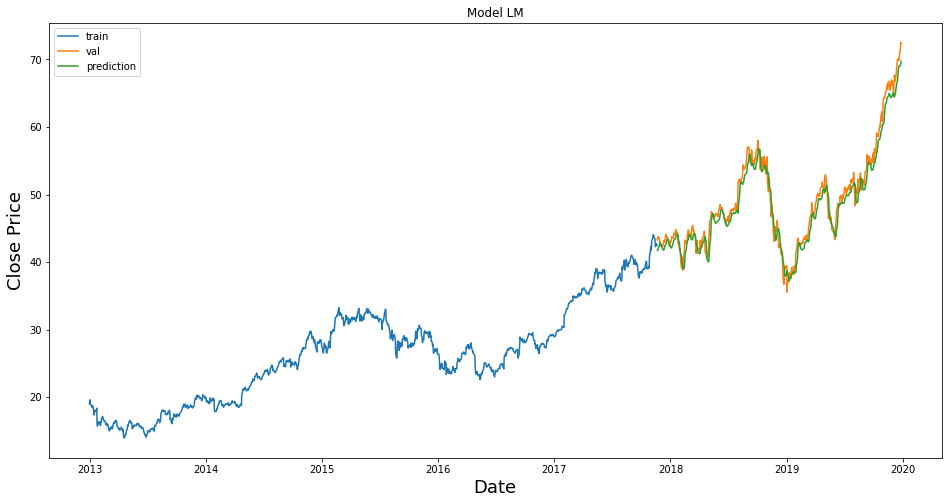

In [22]:
train = data[:training_data_size]
valid = data[training_data_size:]
valid['prediction'] = prediction

plt.figure(figsize=(16,8))
plt.title("Model LM")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Close Price",fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','prediction']])
plt.legend(['train','val','prediction'])
plt.show()

In [23]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
valid.tail()

Close  prediction
Date                             
2019-12-20  69.860001   68.955055
2019-12-23  71.000000   68.977020
2019-12-24  71.067497   69.122902
2019-12-26  72.477501   69.283249
2019-12-27  72.449997   69.739967

In [24]:
difference = pd.DataFrame(valid['Close']-valid['prediction'])
difference.tail()


0
Date                
2019-12-20  0.904945
2019-12-23  2.022980
2019-12-24  1.944595
2019-12-26  3.194252
2019-12-27  2.710030

In [25]:

73.558174-72.879997

0.6781769999999909

In [26]:
#valid = pd.concat(difference)

<ipython-input-27-f296437a345f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['prediction'] = prediction


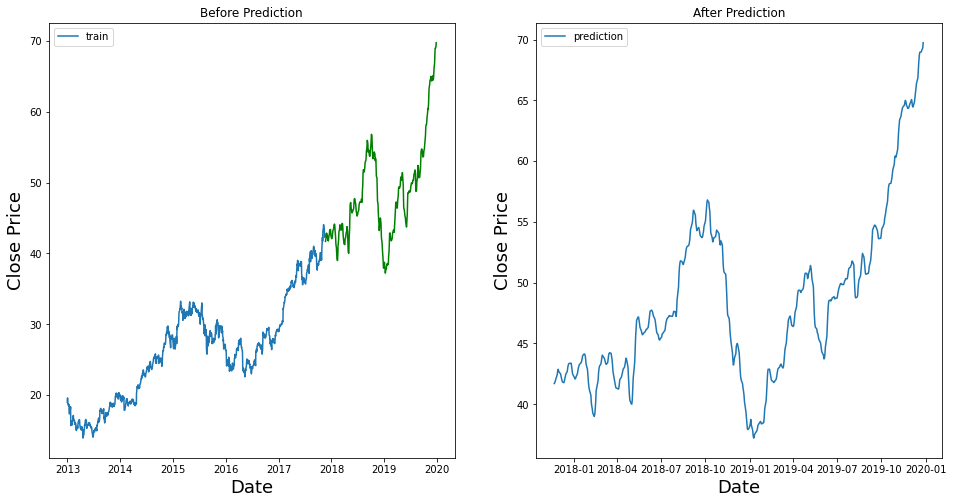

In [27]:
train = data[:training_data_size]
valid = data[training_data_size:]
valid['prediction'] = prediction

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.title("Before Prediction")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Close Price",fontsize=18)
plt.plot(train['Close'])
plt.plot(valid['prediction'],color='green')
plt.legend(['train'])


plt.subplot(1,2,2)
plt.title("After Prediction")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Close Price",fontsize=18)
#plt.plot(train['Close'])
plt.plot(valid['prediction'])
plt.legend(['prediction'])
plt.show()